In [44]:
import pymc as pm
import numpy as np
import aesara.tensor as at
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]
y_train = y_train.iloc[:,1:]
y_test = y_test.iloc[:,1:]

In [22]:
X = np.array(X_train)
y = np.array(y_train)

In [24]:
n = X.shape[0]
p = X.shape[1]

In [25]:
beta_ols = np.linalg.inv(X.T@X)@X.T@y
SSR_beta_ols = y.T@y-y.T@X@np.linalg.inv(X.T@X)@X.T@y
sigma_square_ols = SSR_beta_ols/(n-p)

In [26]:
g = n
ssr_g = y.T@y-g/(g+1)*y.T@X@np.linalg.inv(X.T@X)@X.T@y

In [27]:
shape, scale = (1+n)/2, ((sigma_square_ols+ssr_g)/2)[0,0]

8948.0 41007582.11907024


In [36]:
sample_size = 1000
np.random.seed(551)
sigma_square = 1/(np.random.gamma(shape, scale, sample_size))

In [41]:
beta = np.zeros((sample_size,p))
for i in range(sample_size):
    beta[i,:] = np.random.multivariate_normal(mean=g/(g+1)*beta_ols[:,0], 
                                              cov=g/(g+1)*sigma_square[i]*np.linalg.inv(X.T@X), size=1)

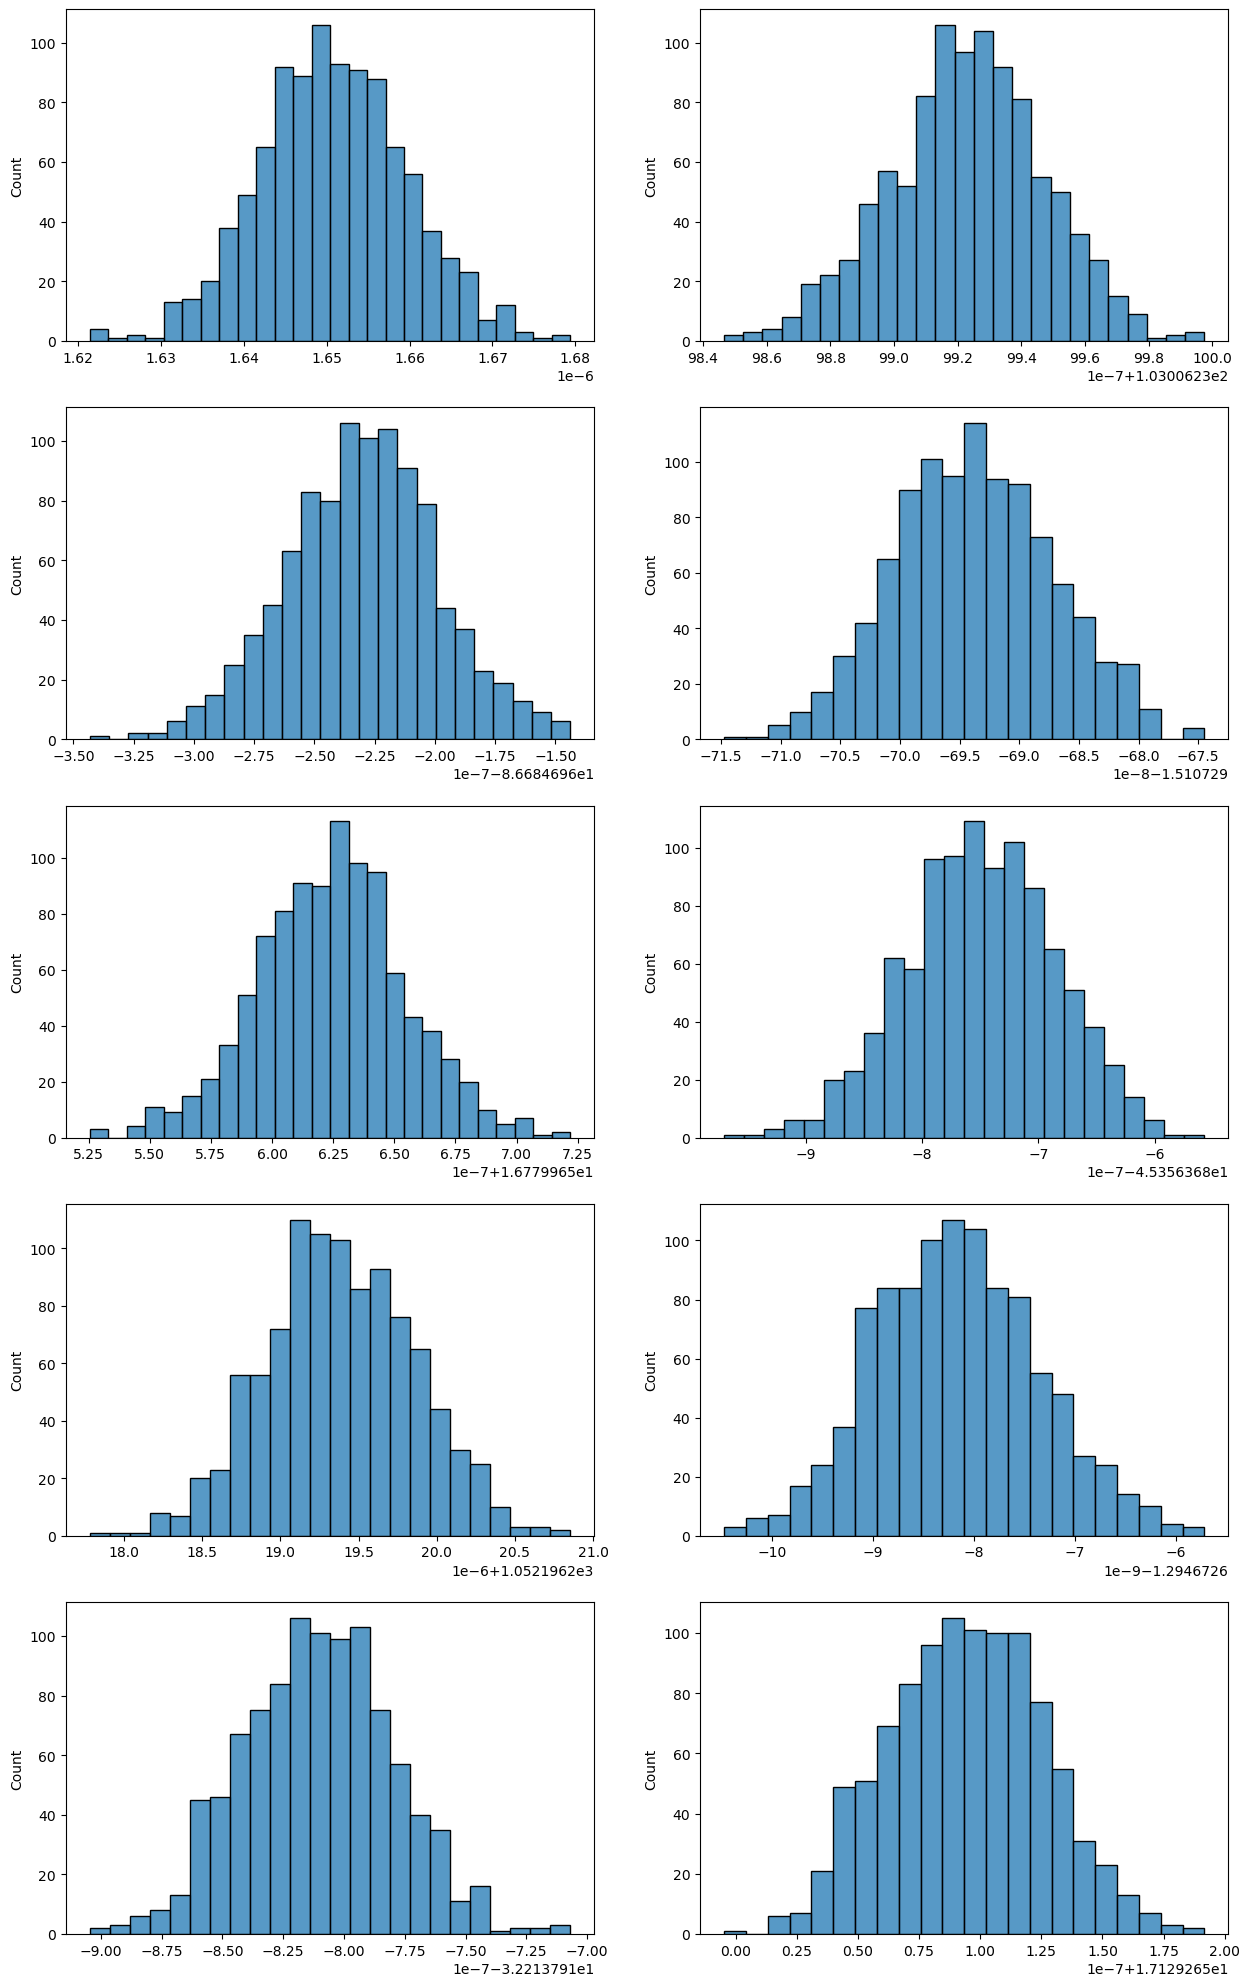

In [52]:
fig, axes = plt.subplots(5,2, figsize=(15,25))
sns.histplot(ax=axes[0,0],x=np.sqrt(sigma_square))
sns.histplot(ax=axes[0,1],x=beta[:,0])
sns.histplot(ax=axes[1,0],x=beta[:,1])
sns.histplot(ax=axes[1,1],x=beta[:,2])
sns.histplot(ax=axes[2,0],x=beta[:,3])
sns.histplot(ax=axes[2,1],x=beta[:,4])
sns.histplot(ax=axes[3,0],x=beta[:,5])
sns.histplot(ax=axes[3,1],x=beta[:,6])
sns.histplot(ax=axes[4,0],x=beta[:,7])
sns.histplot(ax=axes[4,1],x=beta[:,8])
plt.show()

In [55]:
beta_bayes = np.mean(beta,axis=0)

In [57]:
y_test_pred = np.array(X_test)@beta_bayes

In [77]:
np.sum(np.square(np.array(y_test)[:,0]-y_test_pred))/y_test.shape[0]

4642.830967269825

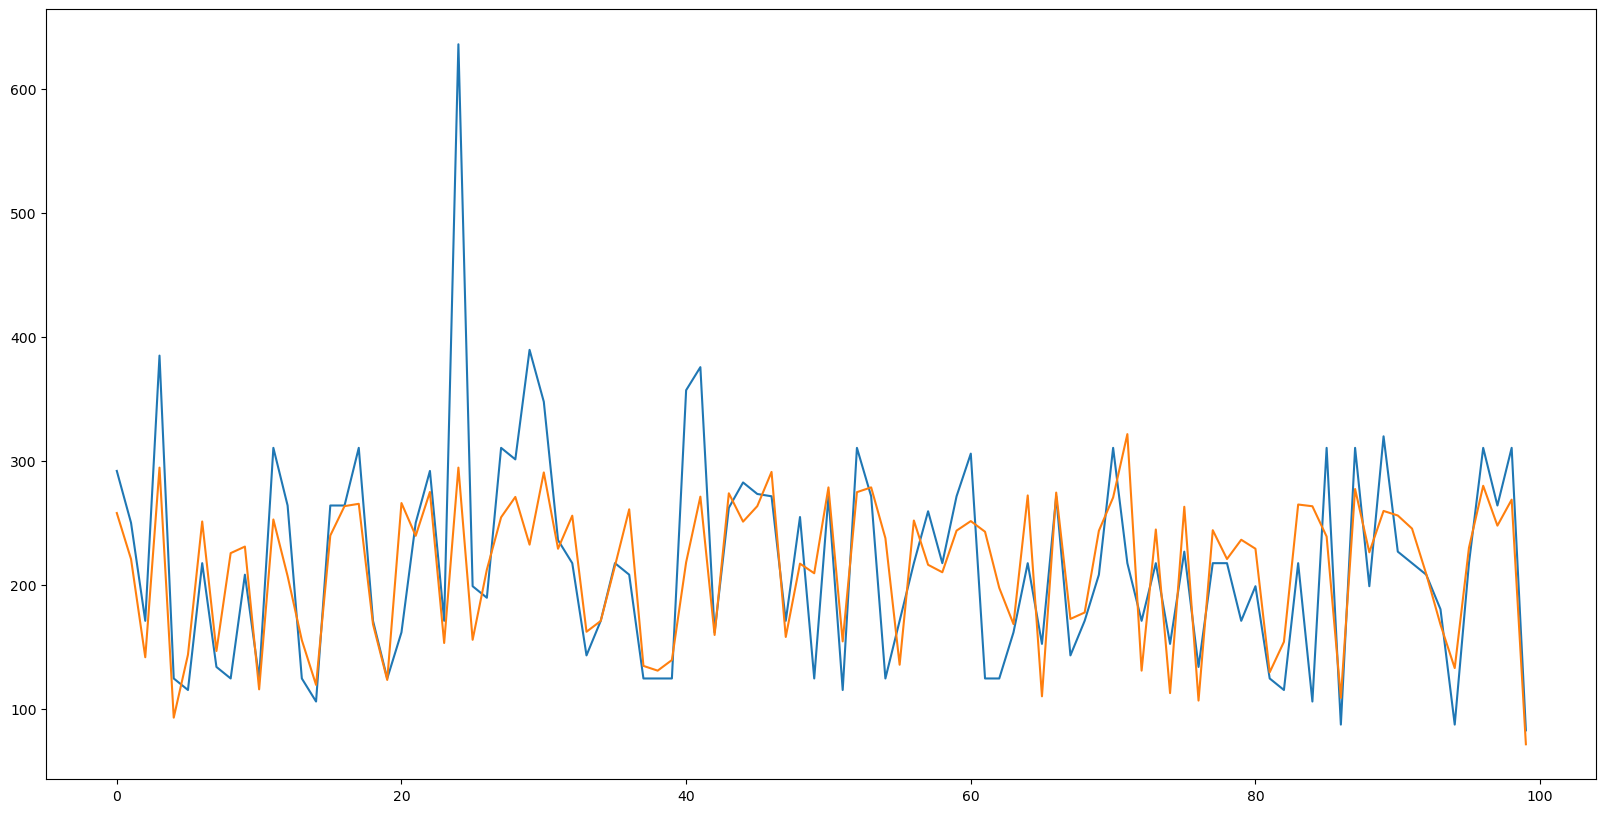

In [85]:
plt.figure(figsize=[20,10])
plt.plot(np.arange(100),np.array(y_test)[:,0][:100])
plt.plot(np.arange(100),np.array(y_test_pred[:100]))
plt.show()